# 三門問題:  
三門，其中一道有車，二道是羊，主持人會在參加者選擇後打開其中一道羊門，讓參賽者選擇是否要更換手上的門  
換之勝率比不換更高  
  
不換門下之勝率:即最初的選擇為中獎門，p=1/3  

換門下之勝率:  
1.最初選擇為中獎門，換門並不會取勝
2.最初選擇為羊門，機率為23，選擇後因主持人必須打開其中一道羊門，即換門必勝


In [1]:
import random
   
trials = 1000 # total number of simulations/trials
 
wins_stick = 0  # number of wins if stick to the door picked initially
wins_switch = 0 # number of wins if switch the door 

random.seed(1) 

for _ in range(trials):
    # 0: door with goat behind
    # 1: door with car behind
    doors = [1,0,0]           # one car and two goats
    random.shuffle(doors)     # shuffling doors randomly
 
    initial_pick = random.randrange(3) # picking a random door
 
    door_initial_pick = doors[initial_pick] # storing initially picked door 
 
    del(doors[initial_pick]) # remaining doors (excluding initial pick)
 
    counter = 0
    for door in doors: 
        if door == 0:
            del(doors[counter]) # deleting a door if a goat behind: door == 0
            break
        counter+=1
 
    if door_initial_pick == 1: # wins_stick adds 1 if initial pick is 1 (goat)
        wins_stick+=1
 
    if doors[0] == 1: # wins_switch adds 1 if it is goat after switch
        wins_switch+=1
 
print("Probablity of Stay to Win =", wins_stick/trials)
print("Probablity of Switch to Win = ", wins_switch/trials)

Probablity of Stay to Win = 0.334
Probablity of Switch to Win =  0.666


# 貝氏:  
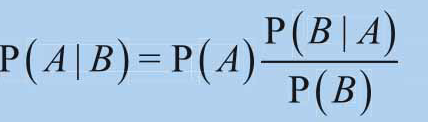  
1.P(A)與P(B)為先驗(歷史資料)  
2.P(A|B)事件B發生後對A之重新評估(後驗);P(B|A)事件A發生後對B之重新評估(後驗)  
3.P(B|A)/P(B)為調整因子(Standarised likelihood)  
4.Standarised likelihood>1,即先驗上升  
5.即P(A)為單一機率,P(A|B)為接收到B事件的資訊後P(A)的機率，若事件B能增加事件A發生的可能性，則Standarised likelihood會大於1  
6.假設P(A)為十字路口，P(B)為打右轉燈，打右轉燈時在十字路口=在十字路口 * (在十字路口打右轉燈/打右轉燈)<十字路口增加了打右轉燈的likelihood

# 三門問題(貝氏):  
1.假設參加者選A,B門為羊,主持打開B門,主持人打開B門下A門有車的機率(即參加者選中之機率)為:  
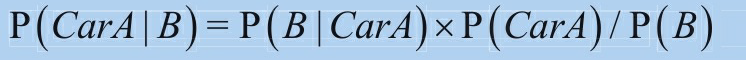  
2.其中主持人打開B門的機率為:A門有車下主持打開B門的機率+B門有車下主持打開B門的機率+C門有車下主持打開B門的機率  
3.由於主持人不可能打開有車的門，即中間項之首項機率為0，次項為1/3(即B有車之機率)；尾項之首項P(B|CAR C)為1，主要是由於在C有車的狀況下，主持人只能打開A跟B，但A已被參加者所選，故必選C，公式如下:  
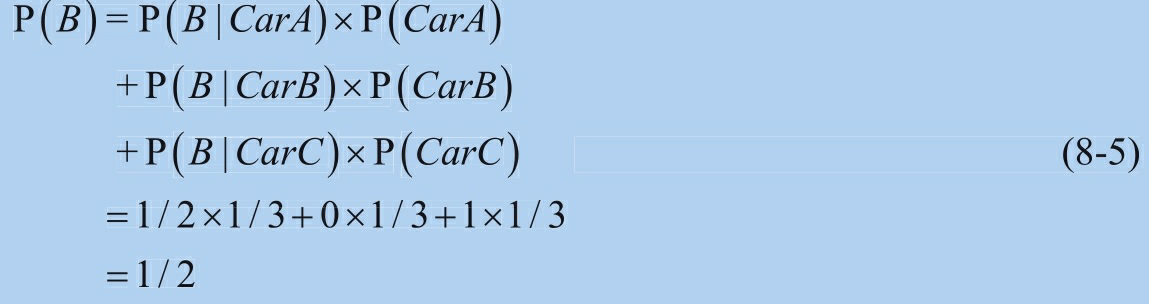  
4.套用入一式，可得結果:在主持人打開B門的狀況下，A為中獎之機率只有1/3  




In [2]:
def bayes_theorem(p_x, p_y_given_x, p_y):
    p_x_given_y = p_x * (p_y_given_x / p_y)
    return p_x_given_y
 
# P(CarA) P(CarB) P(CarC)
p_a = 1/3
p_b = 1/3
p_c = 1/3

# P(B|CarA) P(B|CarB) P(B|CarC)
p_b_given_a = 1/2
p_b_given_b = 0
p_b_given_c = 1

# calculate P(B)
p_b = p_b_given_a*p_a + p_b_given_b*p_b + p_b_given_c*p_c

# calculate P(A|B)
p_a_given_b = bayes_theorem(p_a, p_b_given_a, p_b)

# calculate P(C|B)
p_c_given_b = bayes_theorem(p_c, p_b_given_c, p_b)

# summary
print('Probability of Stay to Win : P(A|B) = %.3f%%' % (p_a_given_b * 100))
print('Probability of Switch to Win : P(C|B) = %.3f%%' % (p_c_given_b * 100))

Probability of Stay to Win : P(A|B) = 33.333%
Probability of Switch to Win : P(C|B) = 66.667%


# 隨機變量:  
1.離散型PMF;連續型PDF;CDF=PDF積分,下圖為PMF與CDF  
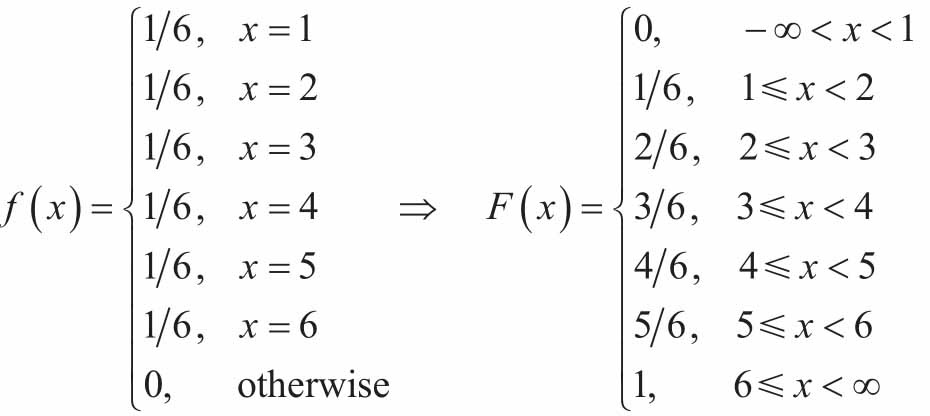  

C:\Users\antho\AppData\Local\Temp/ipykernel_7888/700241823.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  f = pd.Series()
C:\Users\antho\AppData\Local\Temp/ipykernel_7888/700241823.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  F = pd.Series()


Text(0.5, 1.0, 'CDF')

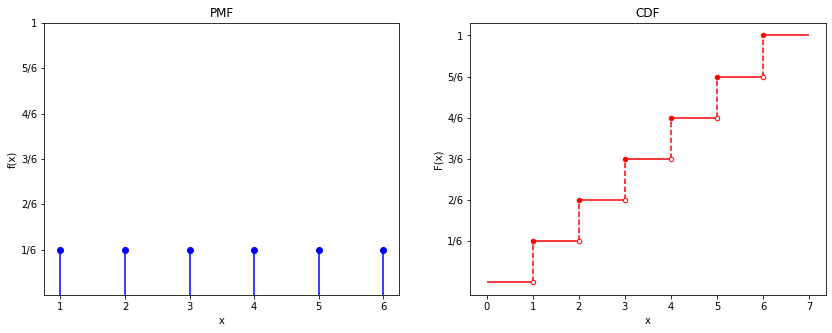

In [3]:
import pandas as pd
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

f = pd.Series()
F = pd.Series()
F.at[0] = 0.0
for x in range(1, 7):
    f.at[x]= 1/6
    F.at[x] = F.at[x-1] + f[x]  

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
# set up positions and labels for y ticks
positions = [1/6, 2/6, 3/6, 4/6, 5/6, 1] 
labels = ['1/6', '2/6', '3/6', '4/6', '5/6', '1']    

# PDF figure
ax1_xticks = range(1,7)

ax1.plot(ax1_xticks, f, 'bo')   
ax1.vlines(ax1_xticks, 0, f, color='blue')

ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_ylim(0.0, 1.0)

ax1.yaxis.set_major_locator(mticker.FixedLocator(positions))
ax1.yaxis.set_major_formatter(plt.FixedFormatter(labels))
ax1.set_title('PMF')

# CDF figure
ax2_xticks = range(0,8)

ax2.hlines(y=F, xmin=ax2_xticks[:-1], xmax=ax2_xticks[1:], color='red', zorder=1)
ax2.vlines(x=ax2_xticks[1:-1], ymin=F[:-1], ymax=F[1:], color='red', linestyle='dashed', zorder=1)

ax2.scatter(ax2_xticks[1:-1], F[1:], color='red', s=20, zorder=2)
ax2.scatter(ax2_xticks[1:-1], F[:-1], color='white', s=20, zorder=2, edgecolor='red')

ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')

ax2.yaxis.set_major_locator(mticker.FixedLocator(positions))
ax2.yaxis.set_major_formatter(plt.FixedFormatter(labels))
ax2.set_title('CDF')

2.隨機變量期望=加權平均隨機變量之值(其中權重為機率)    
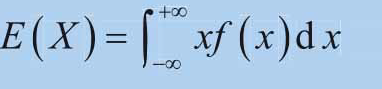  
3.上式f(x)為PDF(即機率),假設  
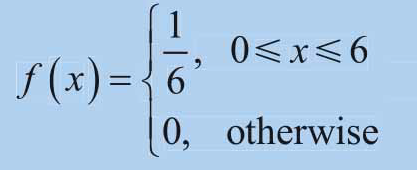  
即  
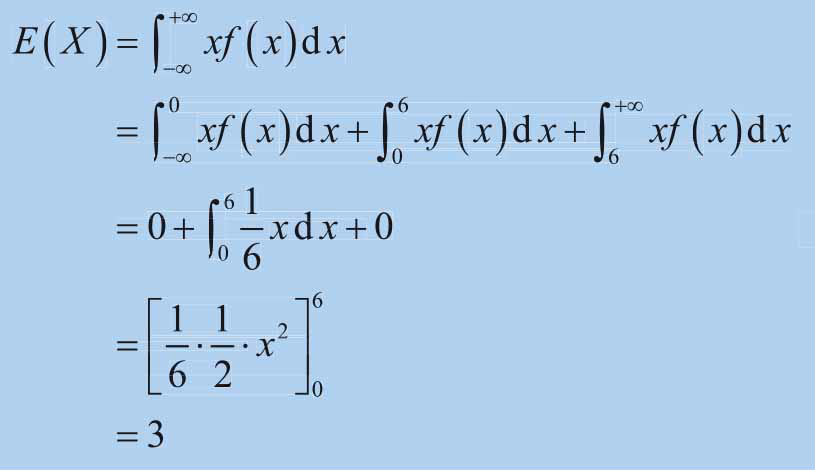



4.隨機變數變異
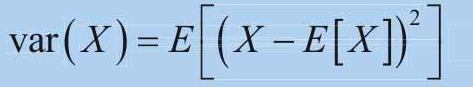  
離散型
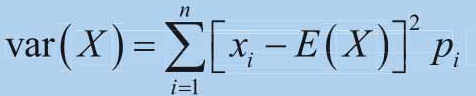  
連續型
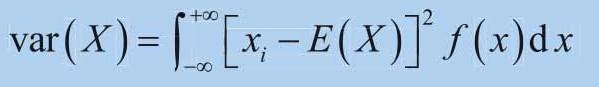  

5.機率密度函數p(x)相對於u的n階矩
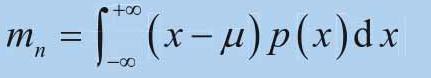  
其中一階原點矩即為隨機變數的期望  
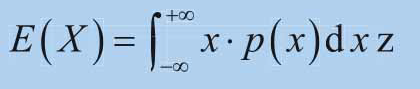  
二階為變異  
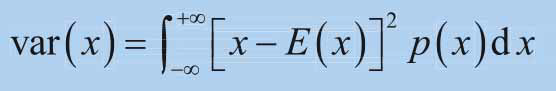  
三階為偏,四階為峰  
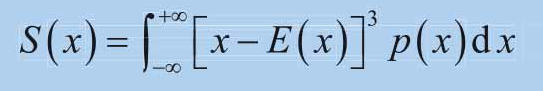  
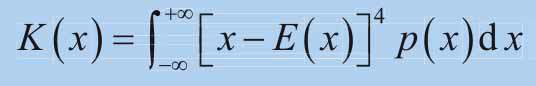

# 離散隨機變量分配: 
1.Uniform之PMF  
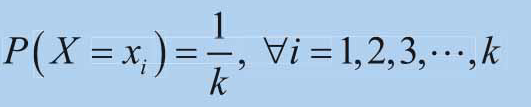  
期望與變異  
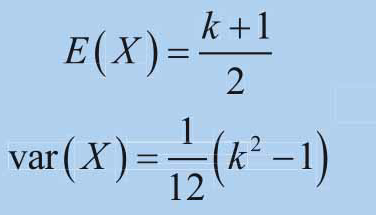

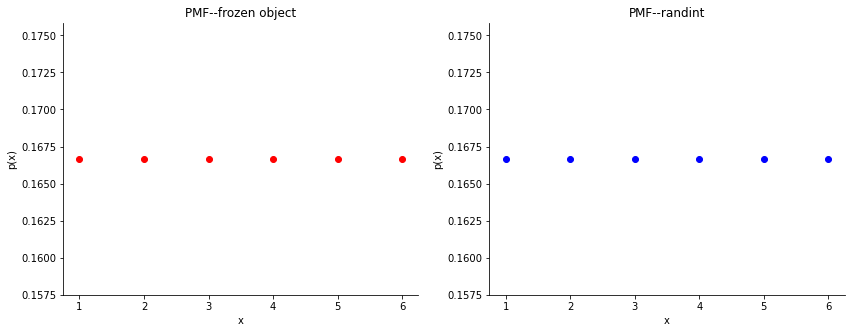

In [4]:
from scipy.stats import randint 
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

low, high = 1, 7#1-6
mean, var, skew, kurt = randint.stats(low, high, moments='mvsk')

x = np.arange(low, high)

# plot from a "frozen" object (holding the given parameters fixed) of discrete uniform random variable
rv = randint(low, high)
ax1.plot(x, rv.pmf(x), 'ro', label='frozen PMF')
ax1.set_xlabel('x')
ax1.set_ylabel('p(x)')
ax1.set_title('PMF--frozen object')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

# plot from random variates
ax2.plot(x, randint.pmf(x, low, high), 'bo', label='randint PMF')
ax2.set_xlabel('x')
ax2.set_ylabel('p(x)')
ax2.set_title('PMF--randint')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

2.Bernoulli之PMF  
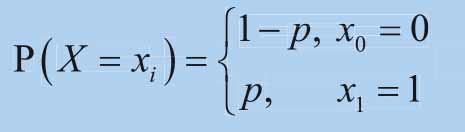  
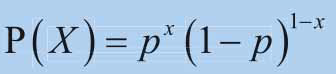  
期望與變異  
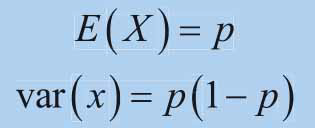  
拋硬幣  
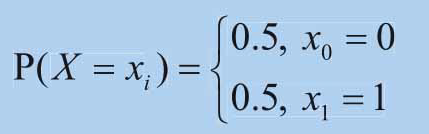


Expectation, Variance, Skewness, Kurtosis:  0.5 0.25 0.0 -2.0


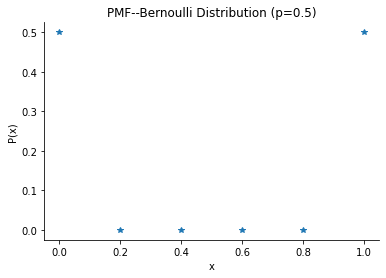

In [5]:
from scipy.stats import bernoulli  
import numpy as np  
import matplotlib.pyplot as plt  

p = 0.5
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print('Expectation, Variance, Skewness, Kurtosis: ', mean, var, skew, kurt)

x = np.linspace(0, 1, 6)     
plt.plot(x, bernoulli.pmf(x, p), '*') 
plt.title('PMF--Bernoulli Distribution (p=0.5)')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

3.Binomial為n次Bernoulli下,期望之結果出現的次數的分配
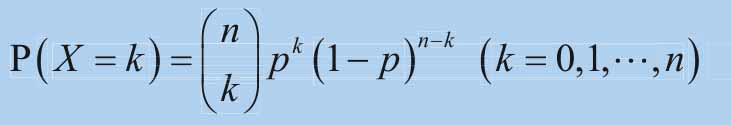  
期望與變異  
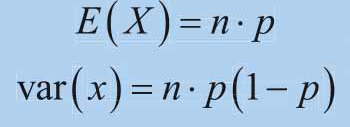  
假設股價上升機率P,下降1-P,每個時刻的價格均為獨立,不會受到上個時刻價格影響,一段時間的價格改變為由N個價之變化構成>即二啤戈為N重Bernoulli;  
隨機變數X代表上升次,出現K次上升符合Binomial>Assue上升P=0.6,一段時間有250個價格變化,求各種狀況機率


Expectation, Variance, Skewness, Kurtosis:  150.0 60.0 -0.0258 -0.0073


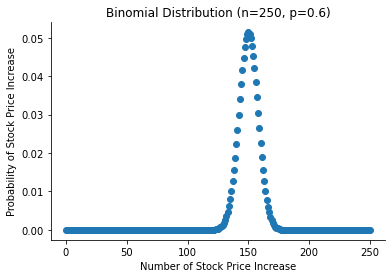

In [6]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

n = 250
p = 0.6

mean,var,skew,kurt = binom.stats(n,p,moments='mvsk')
print('Expectation, Variance, Skewness, Kurtosis: ', mean, var, np.around(skew,4), np.around(kurt,4))

x = np.arange(0, 251)
# scatter graph
plt.plot(x, binom.pmf(x, n, p),'o')

plt.title('Binomial Distribution (n=250, p=0.6)')
plt.xlabel('Number of Stock Price Increase')
plt.ylabel('Probability of Stock Price Increase')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

4.Geometric為n次Bernoulli下,第k次才成功的分配,PMF為  
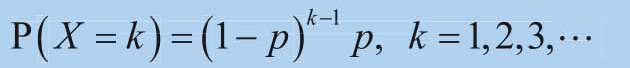  
期望與變異  
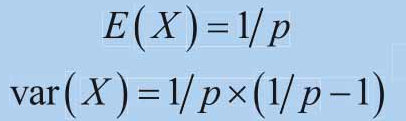

Expectation, Variance, Skewness, Kurtosis:  2.0 2.0 2.1213203435596424 6.5


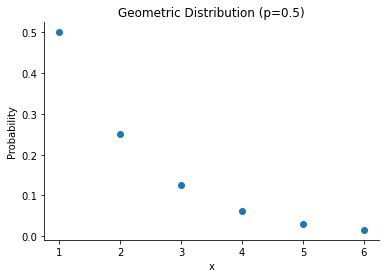

In [7]:
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np

p = 0.5

mean,var,skew,kurt = geom.stats(p,moments='mvsk')
print('Expectation, Variance, Skewness, Kurtosis: ', mean, var, skew, kurt)

x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))

plt.plot(x, geom.pmf(x, p),'o')
plt.title('Geometric Distribution (p=0.5)')
plt.xlabel('x')
plt.ylabel('Probability')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

5.Poisson為Binomial之n極大,P極小之分配,PMF  
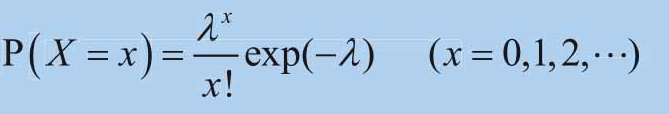  
期望與變異  
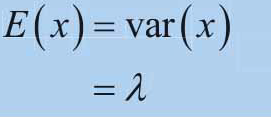  
Assume投組有1000 assets,一年內default可能性=0.2%,各default數之機率

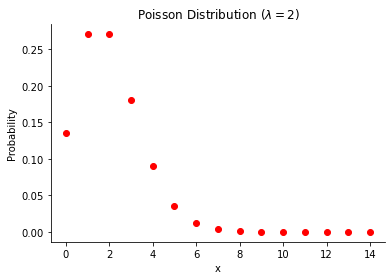

In [8]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

lamb = 2
mean,var,skew,kurt = poisson.stats(lamb, moments='mvsk')

x = np.arange(0, 15)

plt.plot(x, poisson.pmf(x, lamb), 'ro', label=r'$\mathit{\lambda}=%i$' % lamb)
plt.title('Poisson Distribution'+r' ($\mathit{\lambda}=%i$)' % lamb)
plt.xlabel('x')
plt.ylabel('Probability')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

# 連續隨機變量分配: 
1.Uniform之PDF  
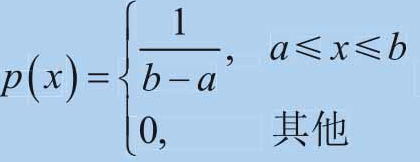  
期望與變異  
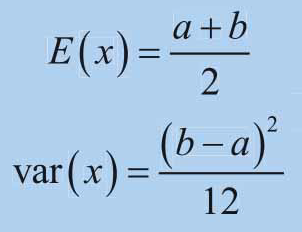

Expectation, Variance, Skewness, Kurtosis:  0.5 0.08 0.0 -1.2


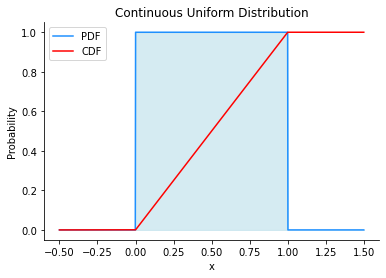

In [10]:
from scipy.stats import uniform
import numpy as np
import seaborn as sns

mean,var,skew,kurt = uniform.stats(moments='mvsk')
print('Expectation, Variance, Skewness, Kurtosis: ', mean, np.around(var,2), skew, kurt)

x = np.linspace(-0.5, 1.5, 1000)
ax = sns.lineplot(x=x, y=uniform.pdf(x), color='dodgerblue', label='PDF')
ax.fill_between(x,uniform.pdf(x), color='lightblue', alpha=0.5)

ax = sns.lineplot(x=x, y=uniform.cdf(x), color='red', label='CDF')

ax.set_title('Continuous Uniform Distribution')
ax.set_xlabel('x')
ax.set_ylabel('Probability')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

2.Exponential與Poisson差異在於是連續還是離散，PDF為  
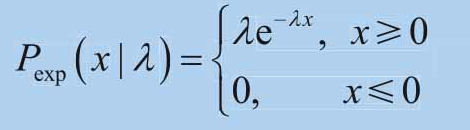  
期望與變異  
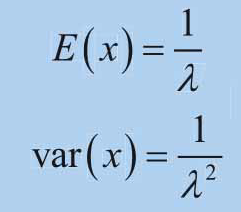  
CDF  
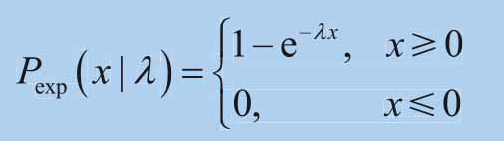  
例:每小時十位客人，欲知道下一五分內至少有一位客人之機率>即5分內下一位客之指數waiting time,速度參數lambda即為60/10=6,x=5(5分鐘)

Expectation, Variance, Skewness, Kurtosis:  0.17 0.03 2.0 6.0


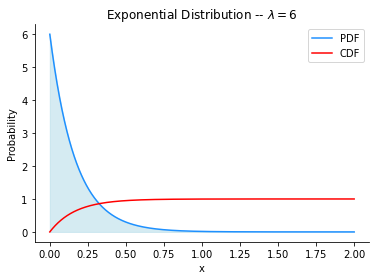

In [12]:
from scipy.stats import expon
import numpy as np
import seaborn as sns

lam = 6
loc = 0
scale = 1.0/lam

mean,var,skew,kurt = expon.stats(loc, scale, moments='mvsk')
print('Expectation, Variance, Skewness, Kurtosis: ', np.around(mean,2), np.around(var,2), skew, kurt)

x = np.linspace(0,2,1000)
ax = sns.lineplot(x=x, y=expon.pdf(x, loc, scale), color='dodgerblue', label='PDF')
ax.fill_between(x,expon.pdf(x, loc, scale), color='lightblue', alpha=0.5)

ax = sns.lineplot(x=x, y=expon.cdf(x, loc, scale), color='red', label='CDF')

ax.set_title('Exponential Distribution -- $\lambda=$' + str(lam))
ax.set_xlabel('x')
ax.set_ylabel('Probability')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

3.Beta,主要用於評估信用風險的回收率,有alpha與beta兩參數,可理解為一個機率的機率分配(事件並不知道機率時,反映出所有機率的可能性),PDF為  
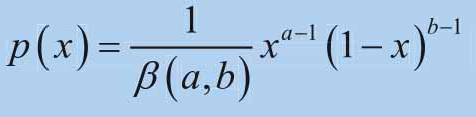  
其中  
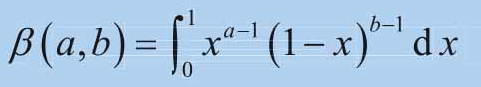  
1/beta(a,b)為用於normalization的常數，a-1為成功次數,b-1為失敗次數(Binomal為成功次數的分配,Beta為成功機率的分配),當a=b=a即為Uniform  
  
平均與變異  
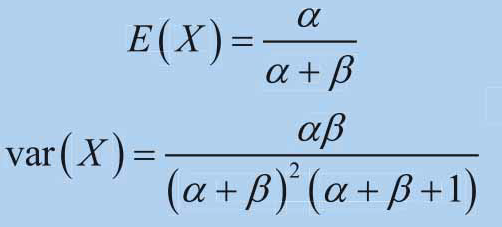

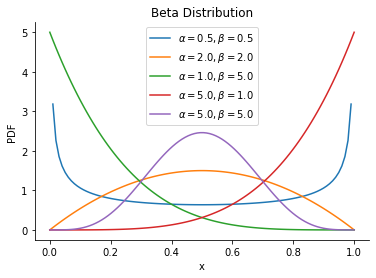

In [13]:
from scipy.stats import beta 
import numpy as np 
import seaborn as sns

x = np.linspace(0, 1.0, 100)   
# varying alpha and beta 
beta1 = beta.pdf(x, 0.5, 0.5) 
beta2 = beta.pdf(x, 2.0, 2.0) 
beta3 = beta.pdf(x, 1.0, 5.0)
beta4 = beta.pdf(x, 5.0, 1.0) 
beta5 = beta.pdf(x, 5.0, 5.0)
ax = sns.lineplot(x=x, y=beta1, label=r'$\alpha=0.5, \beta=0.5$')
ax = sns.lineplot(x=x, y=beta2, label=r'$\alpha=2.0, \beta=2.0$')
ax = sns.lineplot(x=x, y=beta3, label=r'$\alpha=1.0, \beta=5.0$')
ax = sns.lineplot(x=x, y=beta4, label=r'$\alpha=5.0, \beta=1.0$')
ax = sns.lineplot(x=x, y=beta5, label=r'$\alpha=5.0, \beta=5.0$')

ax.set_title('Beta Distribution')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

4.Gamma,alpha為形狀,beta為尺度,為解釋直到第n個隨機事件發生的waiting time(Exponential則是直到第一個隨機事件發生的waiting time),PDF為  
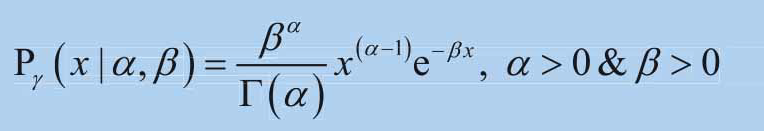  
期望與變異  
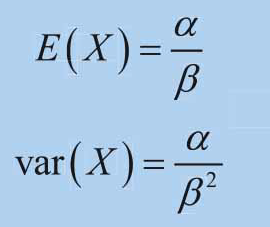

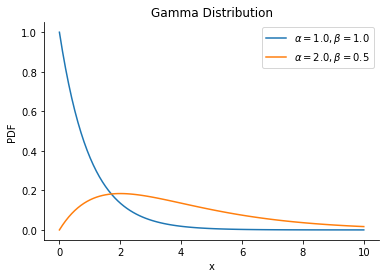

In [14]:
from scipy.stats import gamma 
import numpy as np 
import seaborn as sns

x = np.linspace(0, 10.0, 100)   
# varying alpha and beta 
gamma1 = gamma.pdf(x, 1.0, 0.0, 1.0) 
gamma2 = gamma.pdf(x, 2.0, 0.0, 1/0.5) 

ax = sns.lineplot(x=x, y=gamma1, label=r'$\alpha=1.0, \beta=1.0$')
ax = sns.lineplot(x=x, y=gamma2, label=r'$\alpha=2.0, \beta=0.5$')

ax.set_title('Gamma Distribution')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

5.Normal PDF  
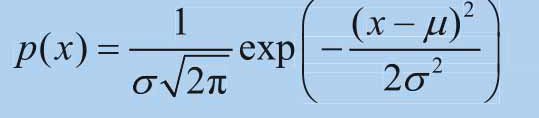  
當u=0&sigma=1  
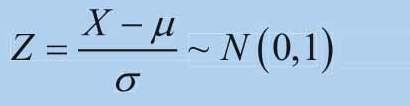  
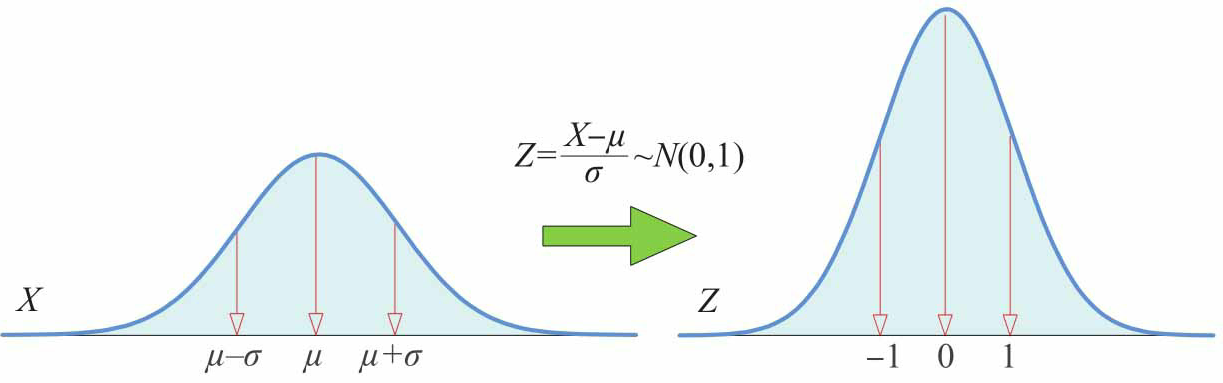

Expectation, Variance, Skewness, Kurtosis:  0.0 1.0 0.0 0.0


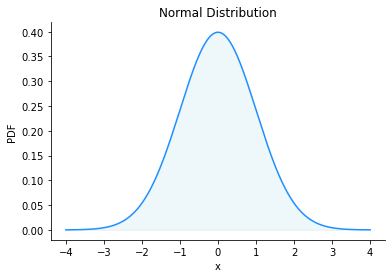

In [15]:
from scipy.stats import norm
import seaborn as sns
import numpy as np

mean,var,skew,kurt = norm.stats(moments='mvsk')
print('Expectation, Variance, Skewness, Kurtosis: ', mean, var, skew, kurt)

x = np.linspace(-4,4,1000)
ax = sns.lineplot(x=x, y=norm.pdf(x), color='dodgerblue')
ax.fill_between(x,norm.pdf(x), color='lightblue', alpha=0.2)

ax.set_title('Normal Distribution')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

68-95-99.7 Rule:68.3%、95.4%和99.7%分配在距平均1個、2個和3個SD範圍

C:\Users\antho\AppData\Local\Temp/ipykernel_7888/1478715183.py:116: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xTickLabels, fontsize = 16)


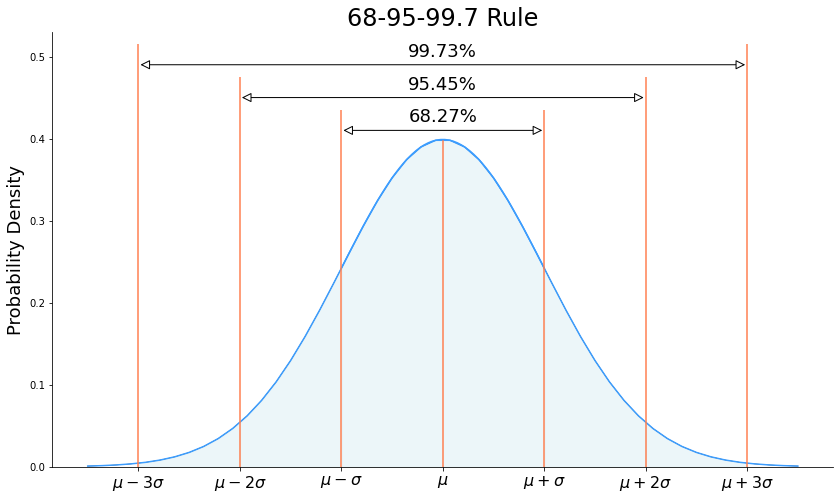

In [16]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# integrate pdf to 68%, 95%, and 99.7%
percent68, _ = quad(norm.pdf, -1, 1, limit = 1000)
percent95, _ = quad(norm.pdf, -2, 2, limit = 1000)
percent99, _ = quad(norm.pdf, -3, 3, limit = 1000)

# plot normal profile
x = np.linspace(-3.5, 3.5)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0, ymax=0.53)
ax = sns.lineplot(x=x, y=y, color='#3C9DFF')
ax.vlines(0, 0, norm.pdf(0), color='coral')

# 68% region
a, b = -1, 1 

# make shaded region
ix = np.linspace(-1, 1)
iy = norm.pdf(ix)
ax = sns.lineplot(x=ix, y=iy, color='#3C9DFF')
ax.fill_between(ix,norm.pdf(ix), color='#DBEEF4', alpha=0.5)

textheight = 0.41
ax.text(0.0, textheight+0.01, r'{0:.2f}%'.format((percent68)*100),
         horizontalalignment='center', fontsize=18);

ax.annotate(r'',
            xy=(-1, textheight), xycoords='data',
            xytext=(1, textheight), textcoords='data',
            arrowprops=dict(arrowstyle="<|-|>",
                            connectionstyle="arc3",
                            mutation_scale=20,
                            fc="w")
            );
ax.vlines(a, 0, textheight+0.025, color='coral')
ax.vlines(b, 0, textheight+0.025, color='coral')

# 95% region
a, b = 1, 2 
# make shaded region
ix = np.linspace(1, 2)
iy = norm.pdf(ix)
ax.fill_between(ix,norm.pdf(ix), color='#DBEEF4', alpha=0.5)

a, b = -2, -1
# make shaded region
ix = np.linspace(-2, -1)
iy = norm.pdf(ix)
ax.fill_between(ix,norm.pdf(ix), color='#DBEEF4', alpha=0.5)

textheight = 0.45
ax.text(0.0, textheight+0.01, r'{0:.2f}%'.format((percent95)*100),
         horizontalalignment='center', fontsize=18);

ax.annotate(r'',
            xy=(-2, textheight), xycoords='data',
            xytext=(2, textheight), textcoords='data',
            arrowprops=dict(arrowstyle="<|-|>",
                            connectionstyle="arc3",
                            mutation_scale=20,
                            fc="w")
            );
ax.vlines(-2, 0, textheight+0.025, color='coral')
ax.vlines(2, 0, textheight+0.025, color='coral')

# 95% region
a, b = 2, 3
# make shaded region
ix = np.linspace(2, 3)
iy = norm.pdf(ix)
ax.fill_between(ix,norm.pdf(ix), color='#DBEEF4', alpha=0.5)

a, b = -3, -2 
# make shaded region
ix = np.linspace(-3, -2)
iy = norm.pdf(ix)
ax.fill_between(ix,norm.pdf(ix), color='#DBEEF4', alpha=0.5)

textheight = 0.49
ax.text(0.0, textheight+0.01, r'{0:.2f}%'.format((percent99)*100),
         horizontalalignment='center', fontsize=18);

ax.annotate(r'',
            xy=(-3, textheight), xycoords='data',
            xytext=(3, textheight), textcoords='data',
            arrowprops=dict(arrowstyle="<|-|>",
                            connectionstyle="arc3",
                            mutation_scale=20,
                            fc="w")
            );

ax.vlines(-3, 0, textheight+0.025, color='coral')
ax.vlines(3, 0, textheight+0.025, color='coral')

# title, labels and ticks
ax.set_title(r'68-95-99.7 Rule', fontsize = 24)
ax.set_ylabel(r'Probability Density', fontsize = 18)

xTickLabels = ['',
               r'$\mu - 3\sigma$',
               r'$\mu - 2\sigma$',
               r'$\mu - \sigma$',
               r'$\mu$',
               r'$\mu + \sigma$',
               r'$\mu + 2\sigma$',
               r'$\mu + 3\sigma$']

ax.set_xticklabels(xTickLabels, fontsize = 16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


如果一個随機變數的對數為Normal分配,則該隨機變數服從Logarithmic Normal分配,PDF為  
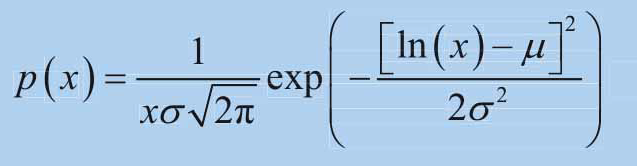  
期望與變異  
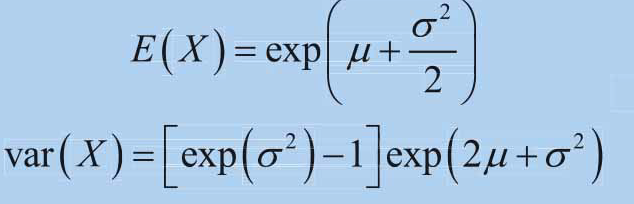

Expectation, Variance, Skewness, Kurtosis:  1.499302500056767 2.805182329887397 4.7453296017972315 57.410756857046074


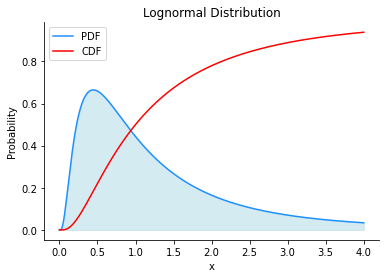

In [17]:
from scipy.stats import lognorm
import numpy as np
import seaborn as sns

# shape parameter
s = 0.9

mean,var,skew,kurt = lognorm.stats(s, moments='mvsk')
print('Expectation, Variance, Skewness, Kurtosis: ', mean, var, skew, kurt)

x = np.linspace(0,4,1000)
ax = sns.lineplot(x=x, y=lognorm.pdf(x, s), color='dodgerblue', label='PDF')
ax.fill_between(x, lognorm.pdf(x, s), color='lightblue', alpha=0.5)
ax = sns.lineplot(x=x, y=lognorm.cdf(x, s), color='red', label='CDF')

ax.set_title('Lognormal Distribution')
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
